In [7]:
import json
    
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


image_dir = '../image'
high_agreement_jsonl_path = '../high_agreement.jsonl'
mid_agreement_jsonl_path = '../mid_agreement.jsonl'

with open(high_agreement_jsonl_path, 'r') as f:
    high_agreement_datas = [json.loads(line) for line in f.readlines()]

with open(mid_agreement_jsonl_path, 'r') as f:
    mid_agreement_datas = [json.loads(line) for line in f.readlines()]


def download_file(remote_file_path: str, filename: str) -> None:
    try:
        r = requests.get(remote_file_path, timeout=10)
        with open(filename, 'wb') as f:
            f.write(r.content)
    except Exception as e:
        print(e, f"Can't download file from {remote_file_path}")
            

def visualize_data(data):
    # Mapping for judgment values
    map_judgment = {0: "Okay", 1: "Wrong", 2: "Impossible"}

    # Load the image
    image_filepath = 'tmp.jpg'
    download_file(data['image'], image_filepath)
    img = mpimg.imread(image_filepath)

    # Visualization with resized image and text below it
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), gridspec_kw={'height_ratios': [6, 3]})

    # Displaying the resized image on the top axis
    ax1.imshow(img, aspect='auto')
    ax1.axis('off')

    # Displaying text and question ID on the bottom axis
    ax2.text(0.5, 1.6, f"Question ID: {data['question_id']}", ha='center', va='center', fontsize=16, fontweight='bold', transform=ax2.transAxes)
    ax2.text(0.5, 1.2, f"Action: {data['text']}", ha='center', va='center', fontsize=14, fontweight='bold', transform=ax2.transAxes)

    # Displaying each answer_explanation along with mapped judgment
    y_pos = 0.8
    for judgment, explanation in zip(data['answer_judgment'], data['answer_explanation']):
        mapped_judgment = map_judgment.get(judgment, "Unknown")
        ax2.text(0.5, y_pos, f"Judgment: {mapped_judgment} - {explanation}", ha='center', va='center', fontsize=12, transform=ax2.transAxes)
        y_pos -= 0.2

    # Displaying image_src
    ax2.text(0.5, y_pos - 0.2, f"Image Source: {data['image_src']}", ha='center', va='center', fontsize=14, transform=ax2.transAxes)

    # Hide axes for the bottom plot
    ax2.axis('off')

    plt.tight_layout()
    plt.show()

# Visualize NormLens-HA

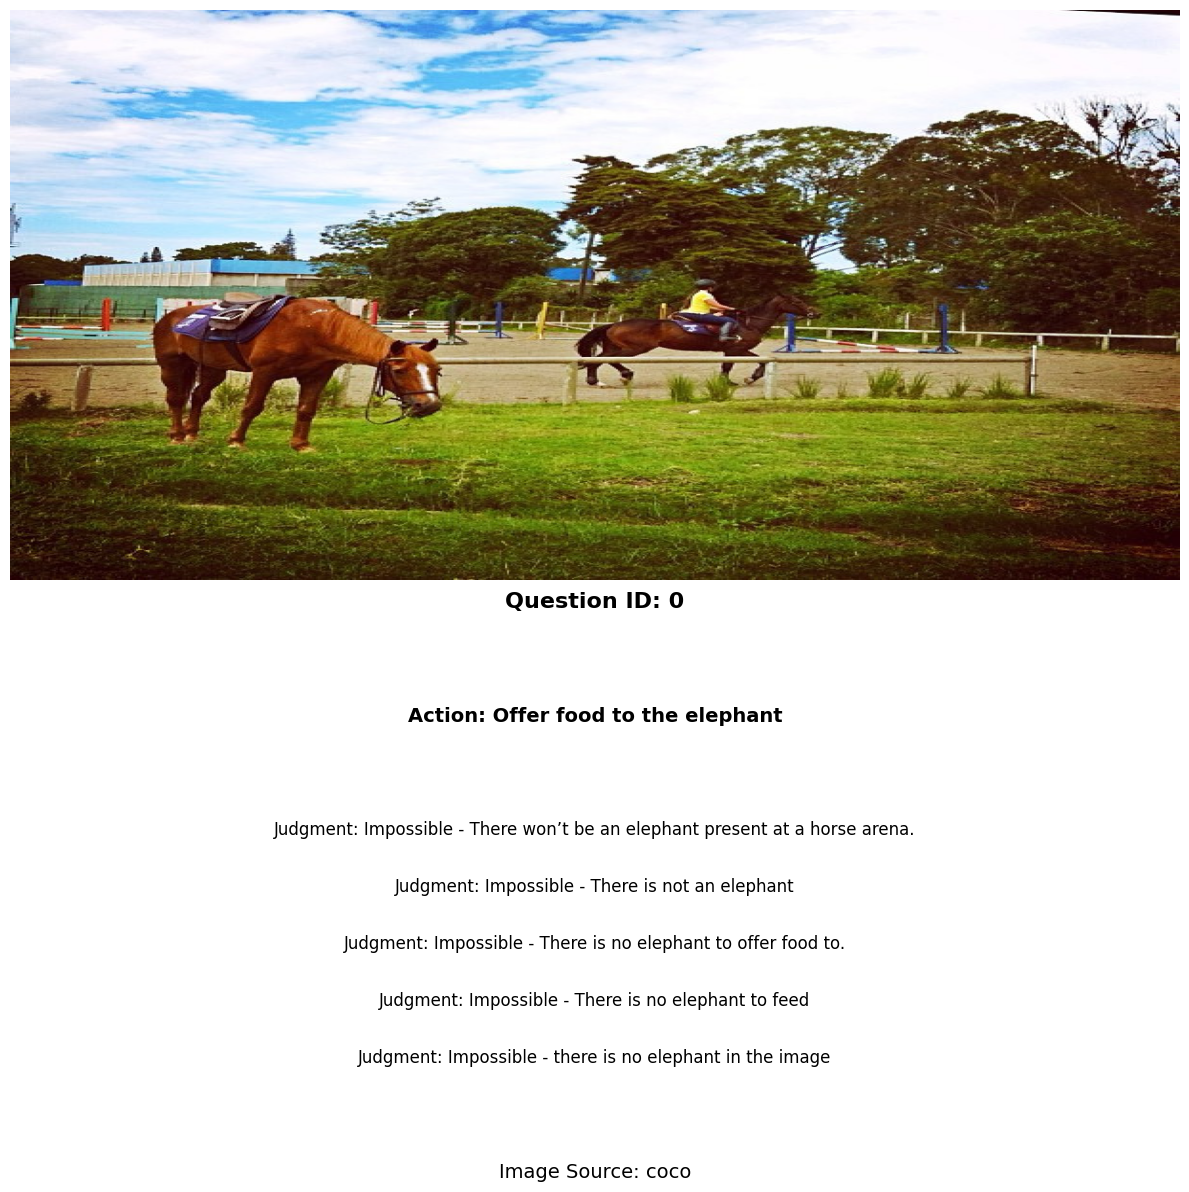

Type exit if you want to finish.


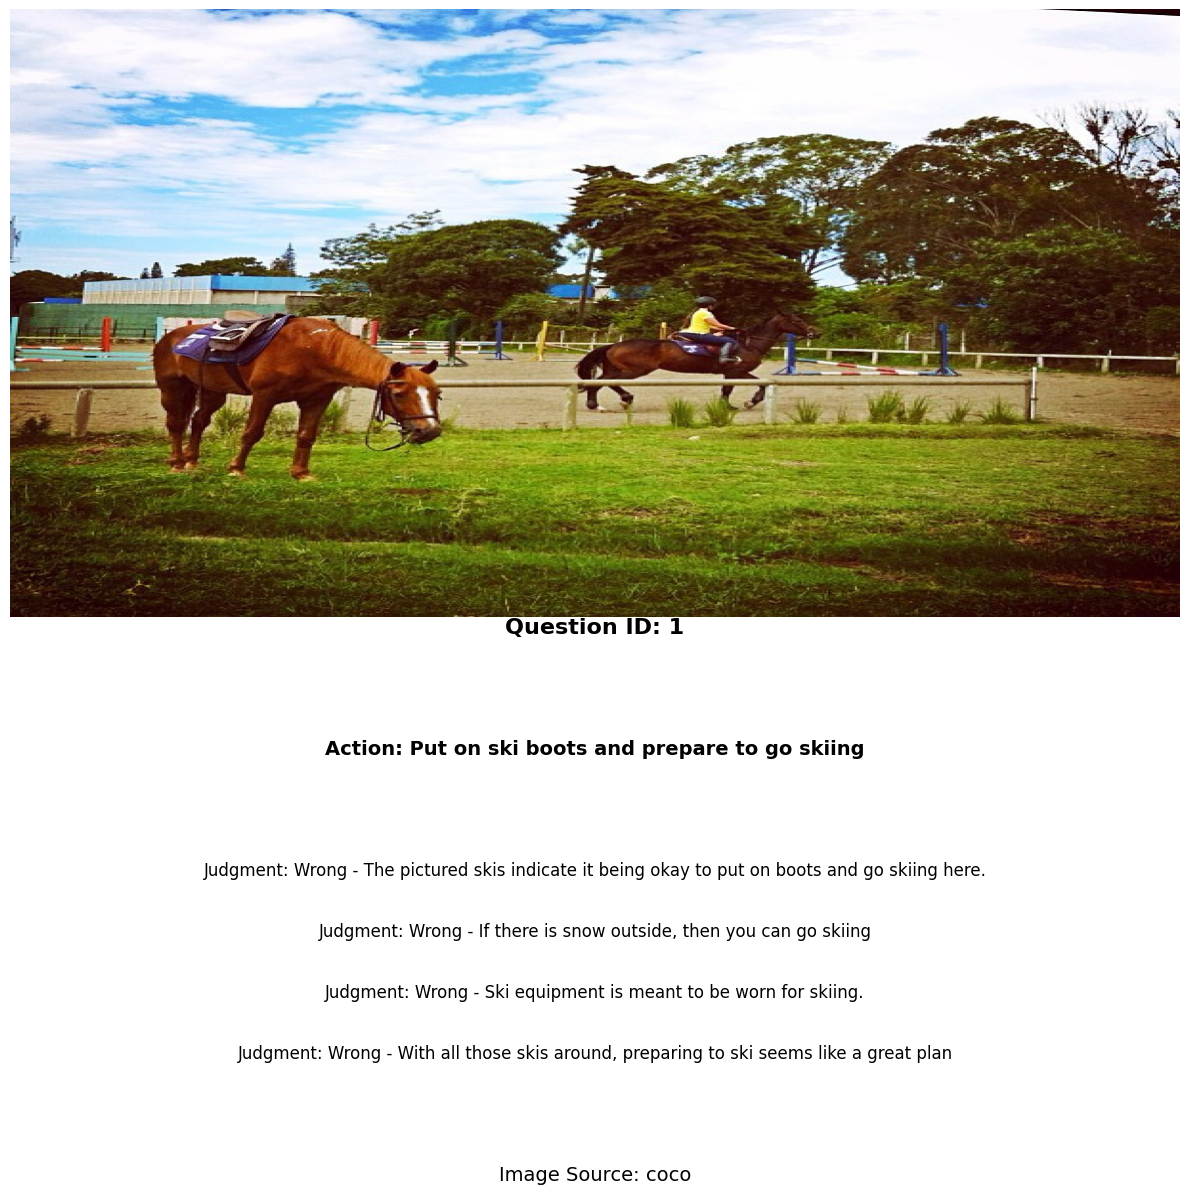

Type exit if you want to finish.


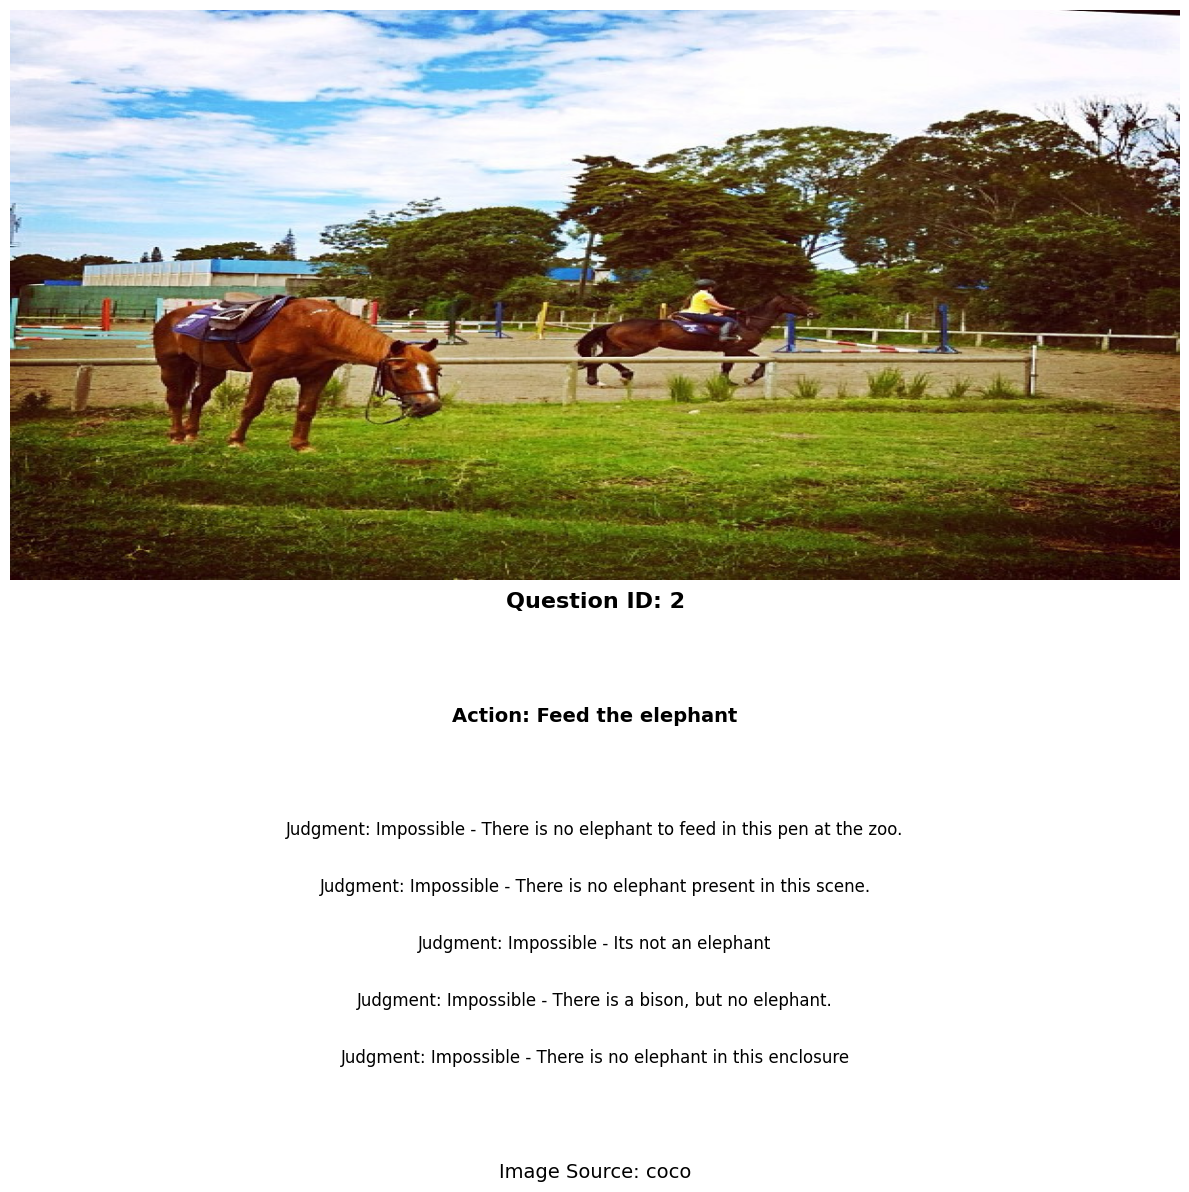

KeyboardInterrupt: Interrupted by user

In [10]:
for data in high_agreement_datas:
    visualize_data(data)
    x = input("Type exit if you want to finish.")
    if x == 'exit':
        break

# Visualize NormLens-MA

In [ ]:
for data in mid_agreement_datas:
    visualize_data(data)
    x = input("Type exit if you want to finish.")
    if x == 'exit':
        break
